# Trump/Clinton Tweets During the 2016 Election

In this notebook you will explore over 6000 Tweets from Donald Trump and Hillary Clinton during the 2016 US presidential election. This dataset comes from Kaggle:

https://www.kaggle.com/benhamner/clinton-trump-tweets

## Imports

In [1]:
import numpy as np
import pandas as pd
from altair import *

## Introduction to spaCy

The [spaCy]() package is a modern, high-performance natural language processing (NLP) library for Python. Let's look at how spaCy can be used for basic NLP tasks, such as tokenization. First import spaCy and load its english lanuage data:

In [2]:
from spacy.util import set_data_path
import spacy

In [3]:
set_data_path('/data/spacy')

In [4]:
nlp = spacy.load('en')

The `nlp` object is a function that provides the main API for working with text. Call it with the text as the argument:

In [5]:
doc = nlp(u'Hello, world.\n Here are two sentences.')

In [6]:
type(doc)

spacy.tokens.doc.Doc

The resulting `Doc` object has a rich API for working with the text. You can iterate over the tokens in the document:

In [7]:
for token in doc:
    print('Token: {}'.format(repr(token.text)))

Token: 'Hello'
Token: ','
Token: 'world'
Token: '.'
Token: '\n '
Token: 'Here'
Token: 'are'
Token: 'two'
Token: 'sentences'
Token: '.'


The tokens themselves are rich objects. Let's grab the first token from this text and look at it further:

In [8]:
token = doc[0]

The `is_punct` attribute tells if the token is punctuation:

In [9]:
token.is_punct

False

The `is_stop` attribute tells if the token is a stop (common) word:

In [10]:
token.is_stop

False

The `is_space` attribute tells if the token is a space (`' '`,`\n`,`\t`):

In [11]:
token.is_space

False

## Tokenization, stop words, punctuation

Write a function, `yield_words`, that uses spaCy to tokenize a string of text, yielding the resulting words. Your function should remove punctuation, stop words and any URLs using spaCy's token attributes:

In [12]:
def yield_words(text):
    """Yield all words in text other than stop words, punctuation or URLs."""
    # YOUR CODE HERE
    doc = nlp(text)
    type(doc)
    for token in doc:
        if (not(token.is_punct or token.is_stop or token.is_space or not token.is_alpha)):
            yield token.lower_

In [13]:
assert list(yield_words(u'Hello, world.\n Here are two https://google.com sentences.'))==\
       ['hello', 'world', 'sentences']

## Counting words

Now that we can generate a list of words, let's count the number of times each word appears. Write a Python function that takes an iterator over words and returns a `dict` of word counts. The keys in the `dicts` should be the words and the values should be the counts. Your function should optionally take a `counts` keyword argument that will let you pass in an existing word count `dict` to which additional counts can be appended.

In [14]:
def count_words(words, counts=None):
    """Return a dictionary with the word counts for the input iterator of words.
    
    If `counts` is None, create and return a new count `dict`.
    If `counts` is a `dict` append new counts to it.
    """
    res = {}
    if (not (counts == None)):
        res = counts
    for word in words:
        if word in res:
            res[word] += 1
        else:
            res[word] = 1
    return res

In [15]:
text = """
On another day of chaotic developments over the week-old order, the State Department reversed its cancellation of visas for people from the affected countries, small numbers of travelers began venturing to airports to try to fly to the United States, and Mr. Trump mounted a harsh personal attack on the judge.
In an early-morning Twitter post from his waterfront Florida resort, where he is spending the first getaway weekend of his presidency, Mr. Trump wrote, “The opinion of this so-called judge, which essentially takes law-enforcement away from our country, is ridiculous and will be overturned!”
"""
counts = count_words(yield_words(text))
assert counts =={'affected': 1, 'airports': 1, 'attack': 1, 'away': 1, 'began': 1, 'called': 1,
                 'cancellation': 1, 'chaotic': 1, 'countries': 1, 'country': 1, 'day': 1, 'department': 1,
                 'developments': 1, 'early': 1, 'enforcement': 1, 'essentially': 1, 'florida': 1, 'fly': 1,
                 'getaway': 1, 'harsh': 1, 'judge': 2, 'law': 1, 'morning': 1, 'mounted': 1, 'mr.': 2,
                 'numbers': 1, 'old': 1, 'opinion': 1, 'order': 1, 'overturned': 1, 'people': 1,
                 'personal': 1, 'post': 1, 'presidency': 1, 'resort': 1, 'reversed': 1, 'ridiculous': 1,
                 'small': 1, 'spending': 1, 'state': 1, 'states': 1, 'takes': 1, 'travelers': 1, 'trump': 2,
                 'try': 1, 'twitter': 1, 'united': 1, 'venturing': 1, 'visas': 1, 'waterfront': 1, 'week': 1,
                 'weekend': 1,
                 'wrote': 1}

AssertionError: 

In [17]:
counts1 = {}
for i in range(10):
    count_words(['the'], counts1)
assert counts1['the']==10

## Trump and Clinton Tweets

Now let's explore the Trump and Clinton tweets. First, load it as a `DataFrame`:

In [18]:
data = pd.read_csv('/data/clinton-trump-tweets/tweets.csv')

In [19]:
data.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


In [20]:
len(data)

6444

Extract the following columns (`handle`, `text`, `time`, `retweet_count`, `favorite_count`) alone into a new `DataFrame`, named `data1`:

In [21]:
# YOUR CODE HERE
data1 = data[['handle','text', 'time', 'retweet_count', 'favorite_count']]

In [22]:
data1.head()

,handle,text,time,retweet_count,favorite_count
0,HillaryClinton,The question in this election: Who can put the...,2016-09-28T00:22:34,218,651
1,HillaryClinton,"Last night, Donald Trump said not paying taxes...",2016-09-27T23:45:00,2445,5308
2,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,2016-09-27T23:26:40,7834,27234
3,HillaryClinton,"If we stand together, there's nothing we can't...",2016-09-27T23:08:41,916,2542
4,HillaryClinton,Both candidates were asked about how they'd co...,2016-09-27T22:30:27,859,2882


In [23]:
assert list(data1.columns)==['handle', 'text', 'time', 'retweet_count', 'favorite_count']
assert len(data1)==6444

## Initial visualizations

Create a 2d scatter plot using:

* `retweet_count` for x.
* `favorite_count` for y.
* `handle` for color.
* A log scale for both x and y.

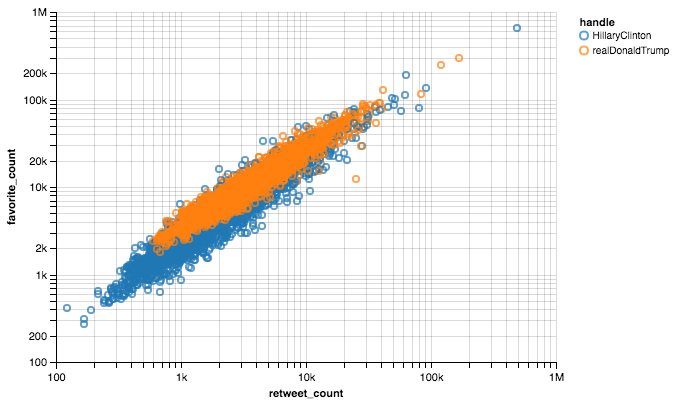

In [24]:
# YOUR CODE HERE
Chart(data1).mark_point().encode(
    X('retweet_count', scale = Scale(type='log')),
    Y('favorite_count', scale = Scale(type='log')),
    Color('handle')
)

Create a line chart to show  the average `favorite_count` for each candidate over time. Use a time unit of years+months and encode the candidate as color:

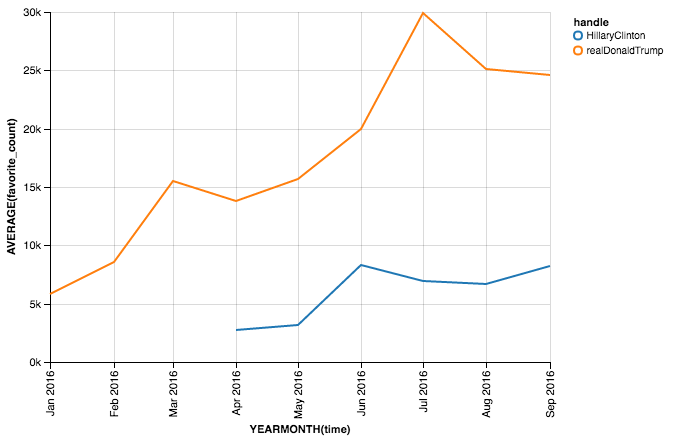

In [25]:
# YOUR CODE HERE
Chart(data1).mark_line().encode(
    X('time:T', timeUnit='yearmonth'),
    Y('average(favorite_count)'),
    Color('handle')
)

## Word counting

Now run a word count on all of Trump's tweets using the `data1` `DataFrame`. Save the resulting word count `dict` in a variable named `trump_counts`:

In [26]:
# YOUR CODE HERE
trump_counts = {}
trump = data[data['handle'] == 'realDonaldTrump']
for text in trump['text']:
    count_words(yield_words(text), trump_counts)

In [27]:
assert type(trump_counts)==dict
assert len(trump_counts)>5000

AssertionError: 

Do the same for Clinton's tweets, saving the word counts in a variable named `clinton_counts`:

In [28]:
# YOUR CODE HERE
clinton_counts = {}
clinton = data[data['handle'] == 'HillaryClinton']
for text in clinton['text']:
    count_words(yield_words(text), clinton_counts)

In [29]:
assert type(clinton_counts)==dict
assert len(clinton_counts)>5000

## Counts as DataFrames

Let's convert the word count `dict`s to `DataFrame`s. Create two `DataFrames`, one for Trump (`trump_df`) and one for Clinton (`clinton_df`). In each `DataFrame` put the words in the first column and the `count` in the second. First create the `DataFrame` for Trump. Sort the rows by count with the largest count at the top:

In [38]:
# YOUR CODE HERE
trump_df = pd.DataFrame(
                   data = {'word': list(trump_counts.keys()),
                           'count': list(trump_counts.values())
                          },
                    columns = ['word', 'count']
)

In [39]:
trump_df.head()

,word,count
0,syrian,5
1,hi,1
2,arrival,1
3,broadcasting,2
4,sixteen,1


In [40]:
len(trump_df)

4640

In [41]:
assert list(trump_df.columns)==['word', 'count']
assert trump_df.word.dtype.name=='object'
assert trump_df['count'].dtype.name=='int64'
assert trump_df.iloc[0,1]==522
assert trump_df.iloc[0,0]=='thank'

AssertionError: 

Now create the `DataFrame` for Clinton, sorting the rows in the same manner:

In [42]:
# YOUR CODE HERE
clinton_df = pd.DataFrame(
                   data = {'word': list(clinton_counts.keys()),
                           'count': list(clinton_counts.values())
                          },
                    columns = ['word', 'count']
                    
)

In [43]:
clinton_df.head()

,word,count
0,hi,1
1,cease,1
2,etched,1
3,circuito,1
4,sued,6


In [44]:
len(clinton_df)

5204

In [45]:
assert list(clinton_df.columns)==['word', 'count']
assert clinton_df.word.dtype.name=='object'
assert clinton_df['count'].dtype.name=='int64'
assert clinton_df.iloc[0,1]==916
assert clinton_df.iloc[0,0]=='trump'

AssertionError: 

## Visualizing counts

Use the `trump_df` `DataFrame` to visualize the counts of the top 20 words using:

* 'count` for x;
* `word` for y; and
* Bar marks

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Use the `clinton_df` `DataFrame` to visualize the counts of the top 20 words using:

* 'count` for x;
* `word` for y; and
* Bar marks

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()